In [1]:
import os

In [2]:
for dirname, _, filenames in os.walk(
    r"D:\GIKI\6th Semester\CV\Project\Computer_Vision_Project.ipynb"
):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import pandas as pd
import os
import math
import numpy as np
import pandas as pd


import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


from tensorflow.keras.utils import to_categorical

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"D:\GIKI\6th Semester\CV\Project\fer2013.csv")

In [6]:
print(df.shape)

(35887, 3)


In [7]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [9]:
emotion_label_to_text = {
    0: "anger",
    1: "disgust",
    2: "fear",
    3: "happiness",
    4: "sadness",
    5: "surprise",
    6: "neutral",
}

In [10]:
emotion_label_to_text

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

In [11]:
df.emotion.value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

In [12]:
counts = df["emotion"].value_counts()

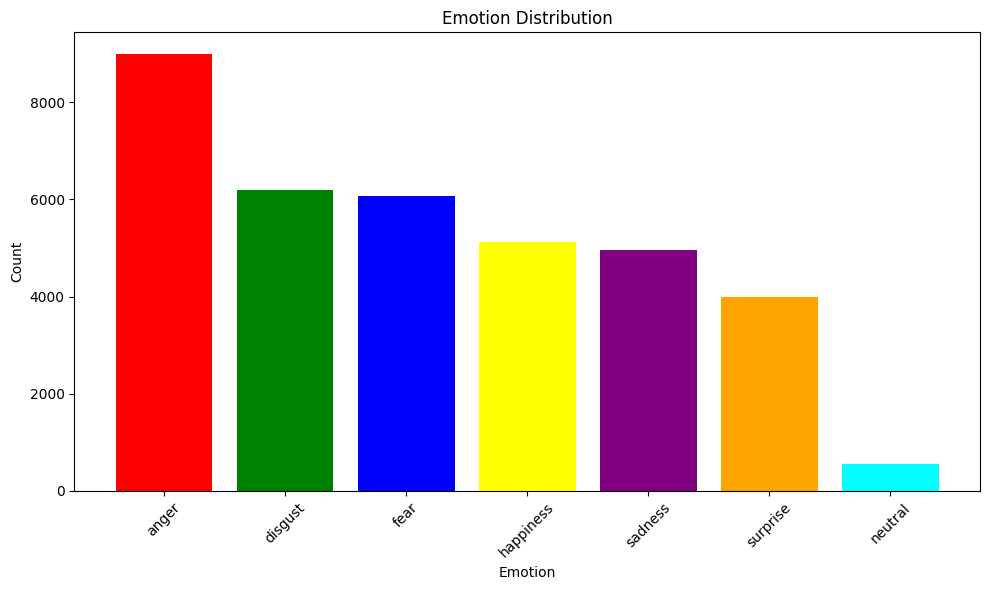

In [13]:
labels = list(emotion_label_to_text.values())


# Defining colors for each emotion
colors = ["red", "green", "blue", "yellow", "purple", "orange", "cyan"]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=colors)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion Distribution")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [14]:
math.sqrt(len(df.pixels[0].split(" ")))

48.0

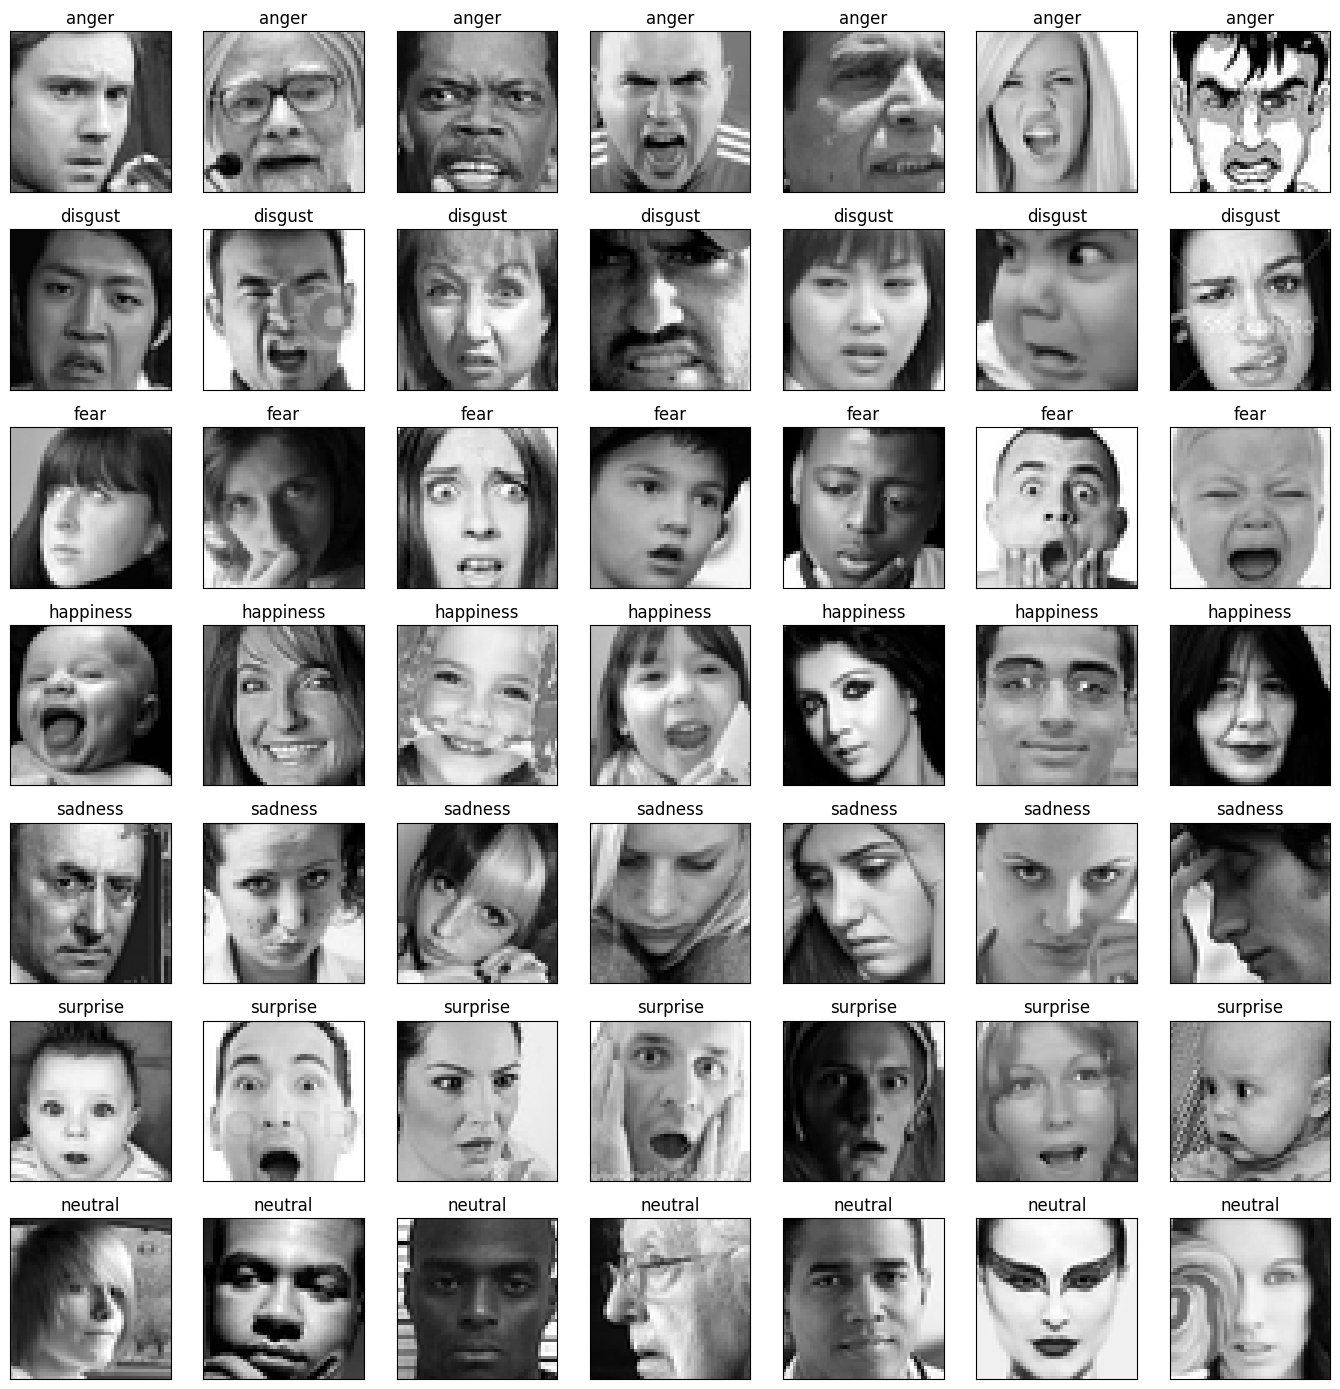

In [15]:
fig = pyplot.figure(1, (14, 14))

k = 0
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion == label].pixels.iloc[k]
        px = np.array(px.split(" ")).reshape(48, 48).astype("float32")

        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        pyplot.tight_layout()

In [16]:
INTERESTED_LABELS = [3, 4, 6]

In [17]:
df = df[df.emotion.isin(INTERESTED_LABELS)]

In [18]:
df.shape

(21264, 3)

In [19]:
img_array = df.pixels.apply(
    lambda x: np.array(x.split(" ")).reshape(48, 48, 1).astype("float32")
)

In [20]:
img_array = np.stack(img_array, axis=0)

In [21]:
img_array

array([[[[ 24.],
         [ 32.],
         [ 36.],
         ...,
         [173.],
         [172.],
         [173.]],

        [[ 25.],
         [ 34.],
         [ 29.],
         ...,
         [173.],
         [172.],
         [173.]],

        [[ 26.],
         [ 29.],
         [ 25.],
         ...,
         [172.],
         [172.],
         [174.]],

        ...,

        [[159.],
         [185.],
         [157.],
         ...,
         [157.],
         [156.],
         [153.]],

        [[136.],
         [157.],
         [187.],
         ...,
         [152.],
         [152.],
         [150.]],

        [[145.],
         [130.],
         [161.],
         ...,
         [142.],
         [143.],
         [142.]]],


       [[[  4.],
         [  0.],
         [  0.],
         ...,
         [ 27.],
         [ 24.],
         [ 25.]],

        [[  1.],
         [  0.],
         [  0.],
         ...,
         [ 26.],
         [ 23.],
         [ 26.]],

        [[  0.],
         [  0.],
      

In [22]:
img_array.shape

(21264, 48, 48, 1)

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
le = LabelEncoder()
img_labels_encoded = le.fit_transform(df["emotion"])

# Convert encoded labels to one-hot encoded vectors
img_labels_one_hot = to_categorical(img_labels_encoded)

# Display the shape of one-hot encoded labels
print(img_labels_one_hot.shape)

(21264, 3)


In [25]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{3: 0, 4: 1, 6: 2}


In [26]:
X_train, X_valid, y_train_encoded, y_valid_encoded = train_test_split(
    img_array,
    img_labels_encoded,
    shuffle=True,
    stratify=img_labels_encoded,
    test_size=0.1,
    random_state=42,
)

In [27]:
y_train = to_categorical(y_train_encoded)
y_valid = to_categorical(y_valid_encoded)

In [28]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(19137, 48, 48, 1) (2127, 48, 48, 1) (19137, 3) (2127, 3)


In [29]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]
img_depth = X_train.shape[3]
num_classes = y_train.shape[1]

In [30]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0

In [31]:
def build_net(optim):
    """
    This is a Deep Convolutional Neural Network (DCNN). For generalization purpose I used dropouts in regular intervals.
    I used `ELU` as the activation because it avoids dying relu problem but also performed well as compared to LeakyRelu
    atleast in this case. `he_normal` kernel initializer is used as it suits ELU. BatchNormalization is also used for better
    results.
    """
    net = Sequential(name="DCNN")

    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5, 5),
            input_shape=(img_width, img_height, img_depth),
            activation="elu",
            padding="same",
            kernel_initializer="he_normal",
            name="conv2d_1",
        )
    )
    net.add(BatchNormalization(name="batchnorm_1"))
    net.add(
        Conv2D(
            filters=64,
            kernel_size=(5, 5),
            activation="elu",
            padding="same",
            kernel_initializer="he_normal",
            name="conv2d_2",
        )
    )
    net.add(BatchNormalization(name="batchnorm_2"))

    net.add(MaxPooling2D(pool_size=(2, 2), name="maxpool2d_1"))
    net.add(Dropout(0.4, name="dropout_1"))

    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation="elu",
            padding="same",
            kernel_initializer="he_normal",
            name="conv2d_3",
        )
    )
    net.add(BatchNormalization(name="batchnorm_3"))
    net.add(
        Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation="elu",
            padding="same",
            kernel_initializer="he_normal",
            name="conv2d_4",
        )
    )
    net.add(BatchNormalization(name="batchnorm_4"))

    net.add(MaxPooling2D(pool_size=(2, 2), name="maxpool2d_2"))
    net.add(Dropout(0.4, name="dropout_2"))

    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3, 3),
            activation="elu",
            padding="same",
            kernel_initializer="he_normal",
            name="conv2d_5",
        )
    )
    net.add(BatchNormalization(name="batchnorm_5"))
    net.add(
        Conv2D(
            filters=256,
            kernel_size=(3, 3),
            activation="elu",
            padding="same",
            kernel_initializer="he_normal",
            name="conv2d_6",
        )
    )
    net.add(BatchNormalization(name="batchnorm_6"))

    net.add(MaxPooling2D(pool_size=(2, 2), name="maxpool2d_3"))
    net.add(Dropout(0.5, name="dropout_3"))

    net.add(Flatten(name="flatten"))

    net.add(
        Dense(128, activation="elu", kernel_initializer="he_normal", name="dense_1")
    )
    net.add(BatchNormalization(name="batchnorm_7"))

    net.add(Dropout(0.6, name="dropout_4"))

    net.add(Dense(num_classes, activation="softmax", name="out_layer"))

    net.compile(loss="categorical_crossentropy", optimizer=optim, metrics=["accuracy"])

    net.summary()

    return net

In [32]:
early_stopping = EarlyStopping(
    monitor="val_accuracy",   
    min_delta=0.001,           
    patience=10,               
    verbose=1,                 
    restore_best_weights=True  
)

lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",  
    factor=0.5,          
    patience=5,          
    min_lr=1e-7,         
    verbose=1            
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [33]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)
train_datagen.fit(X_train)

In [34]:
batch_size = 32  # batch size of 32 performs the best.
epochs = 100
optims = [
    optimizers.Nadam(
        learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"
    ),
    optimizers.Adam(0.001),
]

In [35]:
model = build_net(optims[1])

C:\Users\mobee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_1                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_2                     │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_3                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_4                     │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_5                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_6                     │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_3 (MaxPooling2D)      │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchnorm_7                     │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,395,075 (9.14 MB)

 Trainable params: 2,393,027 (9.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [36]:
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/100


C:\Users\mobee\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 34/598 ━━━━━━━━━━━━━━━━━━━━ 7:49 832ms/step - accuracy: 0.3211 - loss: 2.1030

KeyboardInterrupt: 

In [42]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save("emotion.h5")

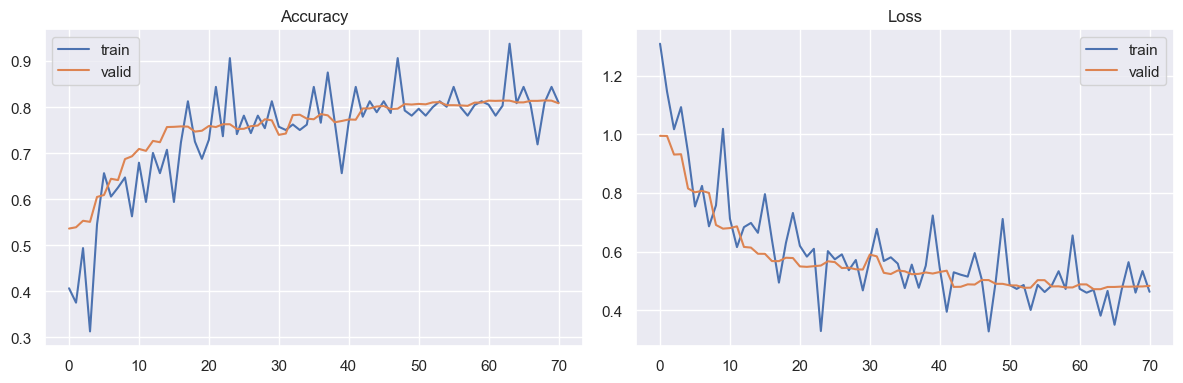

In [43]:
sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(x=history.epoch, y=history.history["accuracy"], label="train")
sns.lineplot(x=history.epoch, y=history.history["val_accuracy"], label="valid")
plt.title("Accuracy")
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(x=history.epoch, y=history.history["loss"], label="train")
sns.lineplot(x=history.epoch, y=history.history["val_loss"], label="valid")
plt.title("Loss")
plt.tight_layout()

plt.savefig("epoch_history_dcnn.png")
plt.show()

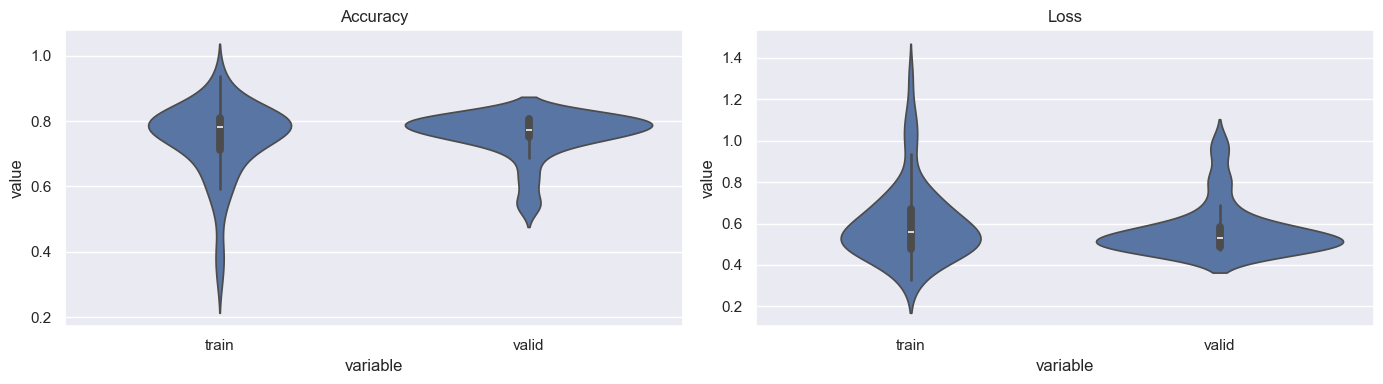

In [44]:
df_accu = pd.DataFrame(
    {"train": history.history["accuracy"], "valid": history.history["val_accuracy"]}
)
df_loss = pd.DataFrame(
    {"train": history.history["loss"], "valid": history.history["val_loss"]}
)

fig = plt.figure(0, (14, 4))
ax = plt.subplot(1, 2, 1)
sns.violinplot(x="variable", y="value", data=pd.melt(df_accu))
plt.title("Accuracy")
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.violinplot(x="variable", y="value", data=pd.melt(df_loss))
plt.title("Loss")
plt.tight_layout()

plt.savefig("performance_dist.png")
plt.show()

In [45]:
import scikitplot

67/67 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step
total wrong validation predictions: 396


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       899
           1       0.79      0.71      0.74       608
           2       0.70      0.76      0.73       620

    accuracy                           0.81      2127
   macro avg       0.80      0.80      0.80      2127
weighted avg       0.82      0.81      0.81      2127



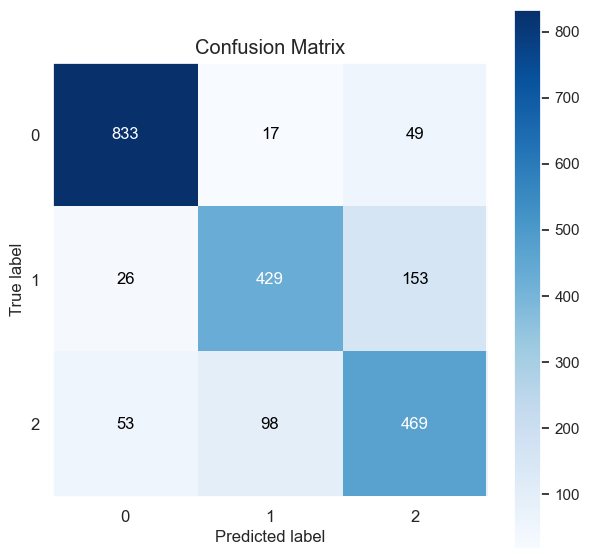

In [46]:
yhat_valid_probs = model.predict(X_valid)
yhat_valid = np.argmax(yhat_valid_probs, axis=1)

scikitplot.metrics.plot_confusion_matrix(
    np.argmax(y_valid, axis=1), yhat_valid, figsize=(7, 7)
)
plt.savefig("confusion_matrix_dcnn.png")

print(
    f"total wrong validation predictions: {np.sum(np.argmax(y_valid, axis=1) != yhat_valid)}\n\n"
)
print(classification_report(np.argmax(y_valid, axis=1), yhat_valid))

In [47]:
mapper = {
    0: "happy",
    1: "sad",
    2: "neutral",
}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


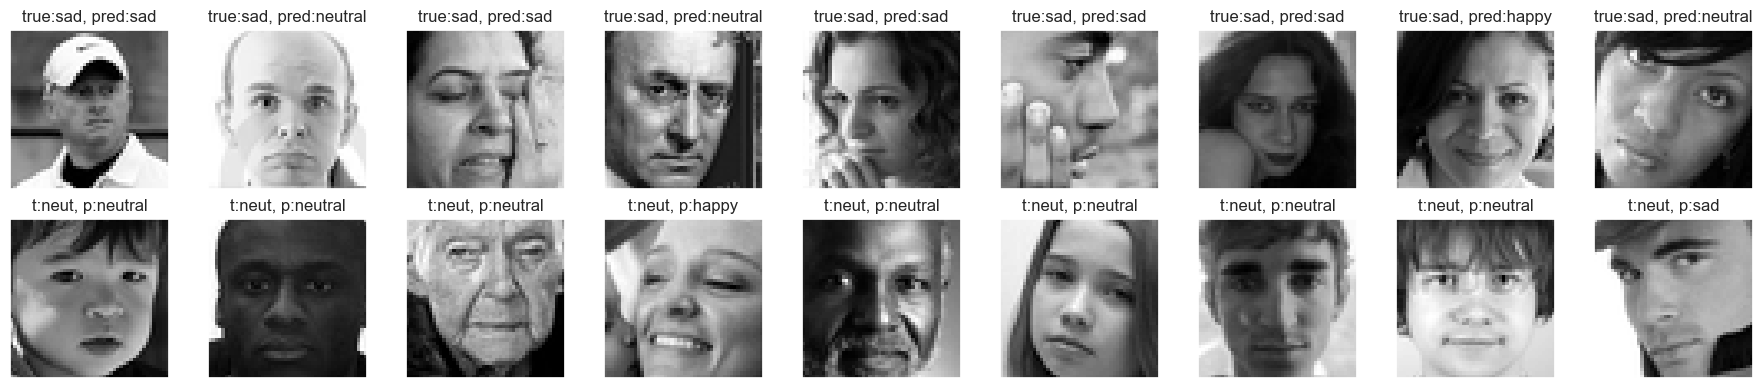

In [48]:
np.random.seed(2)
random_sad_imgs = np.random.choice(np.where(y_valid[:, 1] == 1)[0], size=9)
random_neutral_imgs = np.random.choice(np.where(y_valid[:, 2] == 1)[0], size=9)

fig = plt.figure(1, (18, 4))

for i, (sadidx, neuidx) in enumerate(zip(random_sad_imgs, random_neutral_imgs)):
    ax = plt.subplot(2, 9, i + 1)
    sample_img = X_valid[sadidx, :, :, 0]
    ax.imshow(sample_img, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(
        f"true:sad, pred:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,1)))]}"
    )

    ax = plt.subplot(2, 9, i + 10)
    sample_img = X_valid[neuidx, :, :, 0]
    ax.imshow(sample_img, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(
        f"t:neut, p:{mapper[np.argmax(model.predict(sample_img.reshape(1,48,48,1)))]}"
    )

plt.tight_layout()
plt.show()

LIVE DETECTION

In [1]:
from emotion_detection import emotion_detection

In [2]:
emotion_detection()

C:\Users\mobee\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━